In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/rouge-score/rouge-master/LICENSE
/kaggle/input/rouge-score/rouge-master/.gitignore
/kaggle/input/rouge-score/rouge-master/README.md
/kaggle/input/rouge-score/rouge-master/MANIFEST.in
/kaggle/input/rouge-score/rouge-master/setup.py
/kaggle/input/rouge-score/rouge-master/tests/hyp.txt
/kaggle/input/rouge-score/rouge-master/tests/data.json
/kaggle/input/rouge-score/rouge-master/tests/setup.cfg
/kaggle/input/rouge-score/rouge-master/tests/test_basic.py
/kaggle/input/rouge-score/rouge-master/tests/ref.txt
/kaggle/input/rouge-score/rouge-master/bin/rouge_cmd.py
/kaggle/input/rouge-score/rouge-master/bin/__init__.py
/kaggle/input/rouge-score/rouge-master/rouge/rouge.py
/kaggle/input/rouge-score/rouge-master/rouge/rouge_score.py
/kaggle/input/rouge-score/rouge-master/rouge/__init__.py
/kaggle/input/news-summary/news_summary_more.csv
/kaggle/input/news-summary/news_summary.csv
/kaggle/input/word2vec-for-text-summarization/__results__.html
/kaggle/input/word2vec-for-text-summarizat

In [26]:
!cp -r /kaggle/input/rouge-score/rouge-master /kaggle/working/

In [27]:
%cd /kaggle/working/rouge-master

/kaggle/working/rouge-master


In [28]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing rouge.egg-info/PKG-INFO
writing dependency_links to rouge.egg-info/dependency_links.txt
writing entry points to rouge.egg-info/entry_points.txt
writing requirements to rouge.egg-info/requires.txt
writing top-level names to rouge.egg-info/top_level.txt
reading manifest file 'rouge.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'rouge.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying bin/rouge_cmd.py -> build/lib/bin
copying bin/__init__.py -> build/lib/bin
copying rouge/__init__.py -> build/lib/rouge
copying rouge/rouge.py -> build/lib/rouge
copying rouge/rouge_score.py -> build/lib/rouge
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/bin
copying build/lib/bin/rouge_cmd.py -> build/bdist.linux-x86_64/egg/bin
copying build/lib/bin/__init__.py -> build/bdist.linux-x86_64/egg/bin
creating build/

In [29]:
from rouge import Rouge
rouge = Rouge()

In [30]:
summary = pd.read_csv('/kaggle/input/news-summary/news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('/kaggle/input/news-summary/news_summary_more.csv', encoding='iso-8859-1')

In [31]:
pre1 =  raw.iloc[:,0:2].copy()

pre2 = summary.iloc[:,0:6].copy()
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

In [32]:
pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

In [33]:
# Calculate the number of data points that correspond to 10%
number_of_rows = int(len(pre) * 0.4)

# Take the first 10% of the dataset
pre = pre.iloc[:number_of_rows]

In [34]:
pre.head(2)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",upGrad learner switches to career in ML & Al with 90% salary hike
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",Delhi techie wins free food from Swiggy for one year on CRED


**Seq2Seq LSTM Modelling**
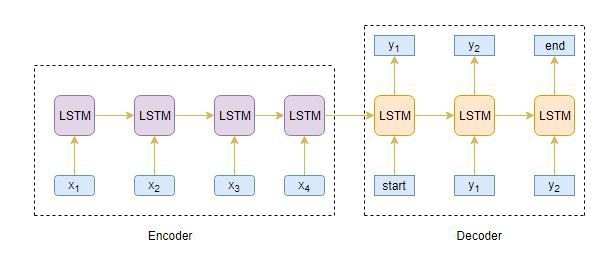

In [35]:
pre['text'][:10]

0    Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...
1    Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...
2    New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's capt...
3    With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢ÂÂ¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, c...
4    Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I've known Hirani for many years...What if it's not true, the [#MeToo] movement w

**Seq2Seq LSTM Modelling**

There are two major components of a Seq2Seq model: Encoder and Decoder.
The input is a long sequence of words and the output will be a short version of the input sequence.
Generally, variants of Recurrent Neural Networks (RNNs), i.e. Gated Recurrent Neural Network (GRU) or Long Short Term Memory (LSTM), are preferred as the encoder and decoder components. This is because they are capable of capturing long term dependencies by overcoming the problem of vanishing gradient.

**Perform Data Cleansing**

In [36]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

In [37]:
brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

In [38]:
from time import time
import spacy
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 2.79 mins


In [39]:
#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:


t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.03 mins


In [40]:
text[0]

'saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.'

In [41]:
summary[0]

'_START_ upgrad learner switches to career in ml al with 90% salary hike _END_'

In [42]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)

In [43]:
pre.head(2)

,text,summary,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program ...",upGrad learner switches to career in ML & Al with 90% salary hike,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgra...,_START_ upgrad learner switches to career in ml al with 90% salary hike _END_
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coi...",Delhi techie wins free food from Swiggy for one year on CRED,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users ge...,_START_ delhi techie wins free food from swiggy for one year on cred _END_


In [44]:
text_count = []
summary_count = []

In [45]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [46]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

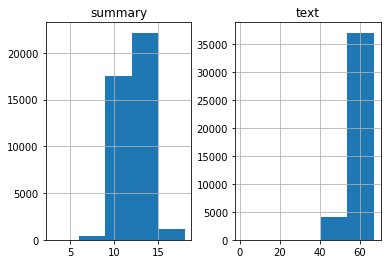

In [47]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [48]:
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

0.9952630811835009


In [49]:
#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

1.0


In [50]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=100
max_summary_len=15

In [51]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [52]:
post_pre.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgra...,_START_ upgrad learner switches to career in ml al with 90% salary hike _END_
1,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users ge...,_START_ delhi techie wins free food from swiggy for one year on cred _END_


I added the START and END special tokens at the beginning and end of the summary. Here, I have chosen sostok and eostok as START and END tokens

In [53]:
#Add sostok and eostok at 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')


In [54]:
post_pre.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgra...,sostok _START_ upgrad learner switches to career in ml al with 90% salary hike _END_ eostok
1,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users ge...,sostok _START_ delhi techie wins free food from swiggy for one year on cred _END_ eostok


**SEQ2SEQ MODEL BUILDING **

Split the data to TRAIN and VALIDATION sets

In [55]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

A tokenizer builds the vocabulary and converts a word sequence to an integer sequence.

In [56]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

Let us look at the proportion rare words and its total coverage in the entire text

Here, I am defining the threshold to be 4 which means word whose count is below 4 is considered as a rare word

**RARE WORD ANALYSIS FOR X i.e 'text'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [57]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 58.52949612773688
Total Coverage of rare words: 2.164786469478627


In [58]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 21688


**RARE WORD ANALYSIS FOR Y i.e 'summary'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [59]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

Let us look at the proportion rare words and its total coverage in the entire summary

Here, I am defining the threshold to be 6 which means word whose count is below 6 is considered as a rare word

In [60]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 70.34805890227577
Total Coverage of rare words: 6.005165191036395


In [61]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 7089


We will now remove "Summary" i.e Y (both train and val) which has only _START_ and _END_

In [62]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [63]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

Return Sequences = True: When the return sequences parameter is set to True, LSTM produces the hidden state and cell state for every timestep

Return State = True: When return state = True, LSTM produces the hidden state and cell state of the last timestep only

Initial State: This is used to initialize the internal states of the LSTM for the first timestep

Stacked LSTM: Stacked LSTM has multiple layers of LSTM stacked on top of each other. This leads to a better representation of the sequence.

Here, we are building a 3 stacked LSTM for the encoder:

In [64]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [83]:
print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 21688
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     4337600     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
________________________________________________

I am using sparse categorical cross-entropy as the loss function since it converts the integer sequence to a one-hot vector on the fly. This overcomes any memory issues.

In [84]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

Early stopping is used to stop training the neural network at the right time by monitoring a user-specified metric. Here, I am monitoring the validation loss (val_loss). My model will stop training once the validation loss increases:

In [85]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

**Start fitting the model with the data**

I train the model on a batch size of 128 and validate it on the test set (which is 10% of the dataset):

In [86]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:], epochs=50, callbacks=[es], batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Train on 36873 samples, validate on 4098 samples
Epoch 1/50
36873/36873 [==============================] - 157s 4ms/sample - loss: 5.0977 - val_loss: 4.7203
Epoch 2/50
36873/36873 [==============================] - 152s 4ms/sample - loss: 4.7193 - val_loss: 4.5442
Epoch 3/50
36873/36873 [==============================] - 152s 4ms/sample - loss: 4.5225 - val_loss: 4.3792
Epoch 4/50
36873/36873 [==============================] - 152s 4ms/sample - loss: 4.3597 - val_loss: 4.2631
Epoch 5/50
36873/36873 [==============================] - 152s 4ms/sample - loss: 4.2124 - val_loss: 4.1514
Epoch 6/50
36873/36873 [==============================] - 154s 4ms/sample - loss: 4.0840 - val_loss: 4.0628
Epoch 7/50
36873/36873 [==============================] - 155s 4ms/sample - loss: 3.9781 - val_loss: 3.9829
Epoch 8/50
36873/36873 [==============================] - 154s 4ms/sample - loss: 3.8842 - val_loss: 3.9148
Epoch 9/50
36873/36873 [==============================] - 153s 4ms/sample - loss: 3.803

**Visualize the model learning**

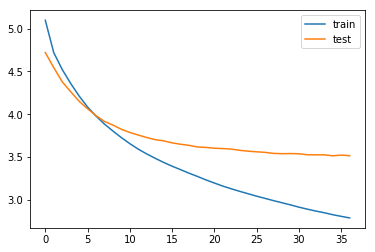

In [87]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Next, let’s build the dictionary to convert the index to word for target and source vocabulary:**

In [88]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

Set up the inference for the encoder and decoder:

In [89]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

**We are defining a function below which is the implementation of the inference process**

In [90]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

**Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:**


In [91]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

**Run the model over the data to see the results**

In [92]:
for i in range(0, 10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: a newly married woman in assam has alleged that she was raped by her husband and two of his friends within few days of their marriage as she didn meet his demands for dowry based on her complaint the police arrested the husband on sunday the incident came to light when she went to hospital in critical condition 
Original summary: start newly wed woman raped by husband his friends over dowry end 
Predicted summary:  start woman raped by husband in up to save her lover end


Review: the first case of nipah virus was reported from in kerala kozhikode where three members of family succumbed to the virus the family was reportedly infected when two members decided to clean bat infested well near their house last month later samples from bats in the well were sent for examination and most of them were nipah positive 
Original summary: start where and how did nipah virus break out in kerala end 
Predicted summary:  start kerala floods hit by nipah virus kills self end


Review: former 

In [93]:
generated_summaries = [decode_sequence(x.reshape(1, max_text_len)) for x in x_val]
generated_summaries[0]

' start j bans sale of rules on migrants end'

In [94]:
assert len(generated_summaries) == len(y_val)

In [95]:
# Convert integer sequences to text for the actual summaries
actual_summaries = [seq2summary(summary) for summary in y_val]
actual_summaries[0]

'start owner chocolate in case of hard brexit end '

In [96]:
rouge_data = pd.DataFrame({
    "generated_summary": generated_summaries,
    "actual_summary": actual_summaries
})

In [97]:
scores = rouge.get_scores(rouge_data['generated_summary'], rouge_data['actual_summary'], avg=True)
scores

{'rouge-1': {'r': 0.31539859129536796,
  'p': 0.3496946210342943,
  'f': 0.3277903666461446},
 'rouge-2': {'r': 0.046178907178175264,
  'p': 0.050629719096044155,
  'f': 0.04770931821963269},
 'rouge-l': {'r': 0.30547322234730473,
  'p': 0.33849935583097585,
  'f': 0.31736471687954837}}

In [98]:
# Extract the F1-scores and multiply by 100 for percentage representation
rouge1_f1 = scores['rouge-1']['f'] * 100
rouge2_f1 = scores['rouge-2']['f'] * 100
rougel_f1 = scores['rouge-l']['f'] * 100

In [99]:
df_scores = pd.DataFrame({
    'Rouge1': [rouge1_f1],
    'Rouge2': [rouge2_f1],
    'Rougel': [rougel_f1]
})
df_scores

,Rouge1,Rouge2,Rougel
0,32.779037,4.770932,31.736472


**Modifying the model**

**Adjusting the LSTM layers and changing the optimizer**

In [67]:
from tensorflow.keras.optimizers import Adam

# Define new model architecture
K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

# Encoder LSTM 4
encoder_lstm4 = LSTM(latent_dim, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm4(encoder_output3)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Using Adam optimizer with a custom learning rate
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy')

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     4337600     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 100, 300), ( 721200      lstm[0][0]                       
______________________________________________________________________________________________

In [68]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [69]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:], epochs=50, callbacks=[es], batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Train on 36873 samples, validate on 4098 samples
Epoch 1/50
36873/36873 [==============================] - 207s 6ms/sample - loss: 5.3281 - val_loss: 4.8010
Epoch 2/50
36873/36873 [==============================] - 195s 5ms/sample - loss: 4.7827 - val_loss: 4.6083
Epoch 3/50
36873/36873 [==============================] - 195s 5ms/sample - loss: 4.6008 - val_loss: 4.4521
Epoch 4/50
36873/36873 [==============================] - 195s 5ms/sample - loss: 4.4315 - val_loss: 4.3330
Epoch 5/50
36873/36873 [==============================] - 195s 5ms/sample - loss: 4.2889 - val_loss: 4.2405
Epoch 6/50
36873/36873 [==============================] - 197s 5ms/sample - loss: 4.1647 - val_loss: 4.1578
Epoch 7/50
36873/36873 [==============================] - 199s 5ms/sample - loss: 4.0485 - val_loss: 4.0846
Epoch 8/50
36873/36873 [==============================] - 199s 5ms/sample - loss: 3.9479 - val_loss: 4.0316
Epoch 9/50
36873/36873 [==============================] - 199s 5ms/sample - loss: 3.855

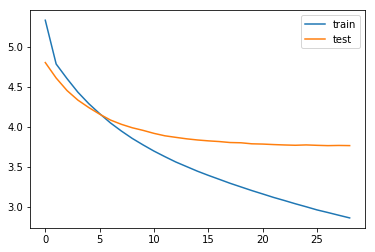

In [70]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [71]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [72]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [73]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [74]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [75]:
for i in range(0, 10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: a newly married woman in assam has alleged that she was raped by her husband and two of his friends within few days of their marriage as she didn meet his demands for dowry based on her complaint the police arrested the husband on sunday the incident came to light when she went to hospital in critical condition 
Original summary: start newly wed woman raped by husband his friends over dowry end 
Predicted summary:  start man kills self after being hit by his car in end


Review: the first case of nipah virus was reported from in kerala kozhikode where three members of family succumbed to the virus the family was reportedly infected when two members decided to clean bat infested well near their house last month later samples from bats in the well were sent for examination and most of them were nipah positive 
Original summary: start where and how did nipah virus break out in kerala end 
Predicted summary:  start delhi hc orders to pay ã¢ââ¹1 cr for violating sterlite plant end


In [76]:
generated_summaries = [decode_sequence(x.reshape(1, max_text_len)) for x in x_val]
generated_summaries[0]

' start j governor inaugurates 1st state in state end'

In [77]:
assert len(generated_summaries) == len(y_val)

In [78]:
# Convert integer sequences to text for the actual summaries
actual_summaries = [seq2summary(summary) for summary in y_val]
actual_summaries[0]

'start owner chocolate in case of hard brexit end '

In [79]:
rouge_data = pd.DataFrame({
    "generated_summary": generated_summaries,
    "actual_summary": actual_summaries
})

In [80]:
scores = rouge.get_scores(rouge_data['generated_summary'], rouge_data['actual_summary'], avg=True)
scores

{'rouge-1': {'r': 0.2602632380633814,
  'p': 0.2711589925718725,
  'f': 0.2625102472531701},
 'rouge-2': {'r': 0.018604587619961088,
  'p': 0.019042864028222847,
  'f': 0.018576982487891136},
 'rouge-l': {'r': 0.25663489146285307,
  'p': 0.2672778931929691,
  'f': 0.258786503759749}}

In [81]:
# Extract the F1-scores and multiply by 100 for percentage representation
rouge1_f1 = scores['rouge-1']['f'] * 100
rouge2_f1 = scores['rouge-2']['f'] * 100
rougel_f1 = scores['rouge-l']['f'] * 100

In [82]:
df_scores = pd.DataFrame({
    'Rouge1': [rouge1_f1],
    'Rouge2': [rouge2_f1],
    'Rougel': [rougel_f1]
})
df_scores

,Rouge1,Rouge2,Rougel
0,26.251025,1.857698,25.87865
